# Introduction

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [194]:
import warnings
warnings.filterwarnings("ignore")


In [215]:
df=pd.read_csv("C:/Users/Chinmay/Downloads/Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Pima Indians Diabetes Database Descriptive Statistics Project
#### Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.
 

#### Columns of the dataset
#### Pregnancies: Number of times pregnant
#### Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
#### Blood Pressure: Diastolic blood pressure (mm Hg)
#### Skin Thickness: Triceps skin fold thickness (mm
#### Insulin: 2-Hour serum insulin (mu U/ml)
#### BMI: Body mass index (weight in kg/(height in m)^2) 
#### Diabetes Pedigree Function: Diabetes pedigree function
#### Age: Age (years)
#### Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

# Information about datatypes
------------------------------------------------------------------------------ :

In [167]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# Data describe

In [169]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 5 points data summaries

| variables | Min | Max | Q1 | Q2 | Q3|
|:---------|----------:|----------:|----------:|----------:|----------:|
| Pregnancies | 0 | 17 | 1 | 3 | 6 |
| Glucose	 | 0 | 199 | 99 | 117 | 140 |
| BloodPressure | 0 | 122 | 62 | 72 | 80 | 
| DSkinThickness | 0 | 99 | 0 | 23 | 32 |
| Insulin | 0 | 846 | 0 | 23 | 32 |
| BMI | 0 | 67 | 27 | 32 | 36 |
| DiabetespedigreeFunction | 0.078 | 2.420 | 0.24375 | 0.3725 | 0.62625 |
| Age | 21 | 81 | 24 | 29 | 41 |
| Outcome | 0 | 1 | 0 | 0 | 1 | 

## Description
   ##### There is a huge variation in mean and 50% for Insulin, could be and outlier or missing data.Check for missing values in the datset inference - Glucose , BloodPressure, Skin Thickness, BMI has 0 as min value which is not possible, hence we can treat this as missingvalues and impute accordingly .

# Findout missing value

In [170]:
print((df==0).any().sum())
print((df==0).sum())

7
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [216]:
# we need drop insulin column becuse of maximum number of null value
df=df.drop('Insulin',axis =1)
df.shape

(768, 8)

# We need to drop all rows with missing values .

In [217]:
df=df[-(df[df.columns[1:-1]] == 0).any(axis=1)]
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
6,3,78,50,32,31.0,0.248,26,1
8,2,197,70,45,30.5,0.158,53,1
13,1,189,60,23,30.1,0.398,59,1
14,5,166,72,19,25.8,0.587,51,1
16,0,118,84,47,45.8,0.551,31,1
18,1,103,30,38,43.3,0.183,33,0


In [218]:
df.shape

(532, 8)

# Appropriate measures of central tendency for Glucose and outcome column

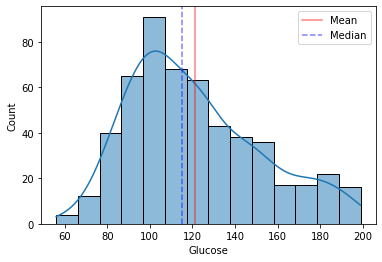

In [219]:
# Analyzing glucose column
sns.histplot(data= df["Glucose"],kde=True)
plt.axvline(x=df.Glucose.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=df.Glucose.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.legend()

## checking outliers

In [200]:
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3-Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

In [206]:
#Find outliers
Outliers = []
for i in range(len(df["Glucose"])) :
    if df["Glucose"][i] < Lower or df["Glucose"][i] > Upper :
        Outliers.append(i)
        
Outliers        

[75, 182, 342, 349, 502]

### Here we can see data of glucose is looks like right skewed and there are some outliers , thats why we preffer take median as central tendency  

In [203]:
df.Glucose.agg('median')

115.0

### Becuse of outcome variable have catagorical value thats why we use mode as central tendency

In [45]:
df.Outcome.agg('mode')

0    0
dtype: int64

# Plot to examine the relationship between Age and Glucose

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

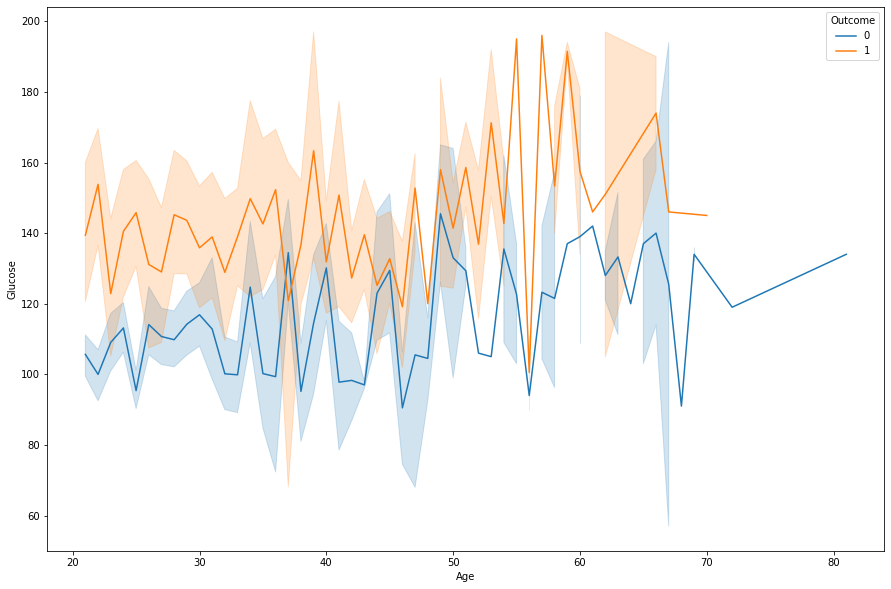

In [138]:
plt.figure(figsize=(15,10))
sns.lineplot('Age','Glucose',hue='Outcome',data=df)

# Distribution of Outcome variable

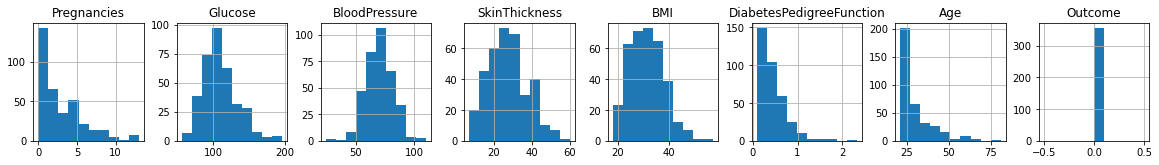

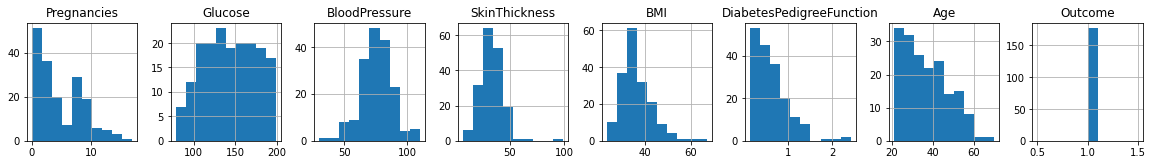

In [223]:
## See the variables with respect to outcome variable

df.groupby('Outcome').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show()

# skewness of all variable

the skewness value of Glucose is 0.6092162217439602
the skewness value of BloodPressure is -0.004613140111976424
the skewness value of SkinThickness is 0.6853104565076703
the skewness value of BMI is 0.6316353080134374
the skewness value of DiabetesPedigreeFunction is 1.9041448106324508
the skewness value of Age is 1.2733042722822805


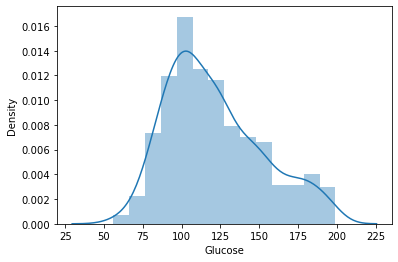

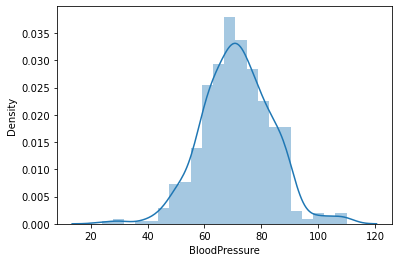

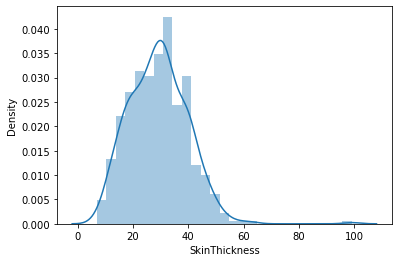

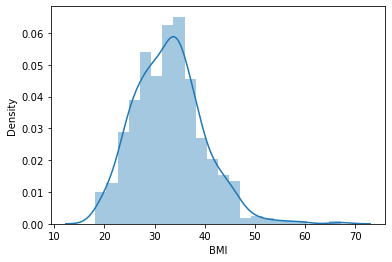

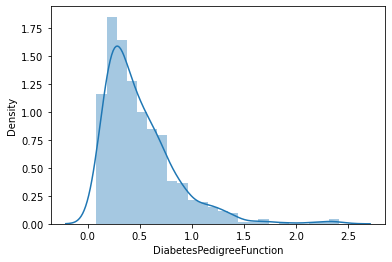

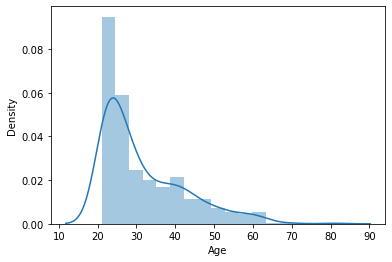

In [222]:
for i in df.columns[1:-1]:
    plt.subplots()
    sns.distplot(df[i])
    d=print(f"the skewness value of {i} is {df[i].skew()}")
    d

| variables | Skewed value | Distribution of skewness | Direction |
|:---------|----------:|----------:|----------:|
| Glucose	 | 0.609.. | moderately skewed | right skewed |
| BloodPressure | -0.0046.. | approximately syymetric | symmetrical | 
| DSkinThickness | 0.6853.. | moderately skewed | right skewed |
| BMI | 0.631 | moderately skewed | right skewed | 
| DiabetespedigreeFunction | 1.904 | highly skewed | right skewed |
| Age | 1.273 | highly skewed | right skewed |

## Median should be the measures of central tendency and dispersion for skewed data

# examine the outliers of these variables.

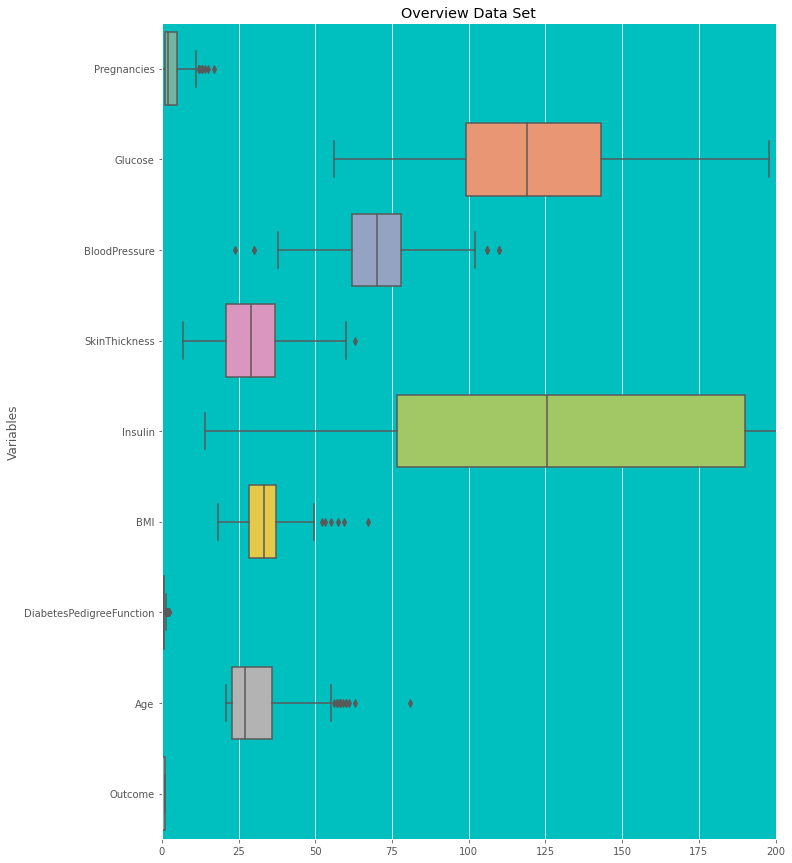

In [133]:
plt.style.use('ggplot') 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('c')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

### AS we can see in plot pregnancies,bloodpressure,skinthickness,BMI,DiabetesPedigreeFunction variables have outliers
